# Knn na doença não separável linearmente

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('nova_doenca2.csv',sep=';')

df.iloc[2,0]=2.5
df.head(),len(df)

(   indicador1  indicador2  diagnóstico
 0         1.0           3            1
 1         2.0           3            0
 2         2.5           8            1
 3         5.0           8            0
 4         8.0          10            1, 10)

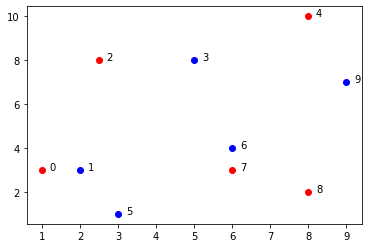

In [27]:
for i in range(len(df)):
    if df['diagnóstico'].iloc[i]==1:
        plt.plot(df.iloc[i,0],df.iloc[i,1],'ro')
    else:plt.plot(df.iloc[i,0],df.iloc[i,1],'bo')
    plt.text(df.iloc[i,0]+0.2,df.iloc[i,1],str(i))
plt.show()

Obter a acurácia com regressão logística e sklearn

In [28]:
from sklearn.linear_model import LogisticRegression
rl=LogisticRegression()
X=np.array(df)[:,:-1]
y=np.array(df['diagnóstico'])
X,y
rl.fit(X,y)
ye=rl.predict(X)
accuracy_score(y,ye)

0.5

Crie a função dist, com a distância Euclidiana entre dois vetores

In [10]:
def dist(v1,v2):
    
    return np.linalg.norm(v2-v1)



Teste a função dist com os vetores (1,1) e (2,2)...o resultado deve ser 1.414..

In [ ]:
dist(np.array([1,1]),np.array([2,2]))

1.4142135623730951

Crie uma função v_dist que retornará um array (ordenado pela distância do vetor v a cada linha de X) com tuplas t, sendo t[0]:distância, t[1] a linha de X e t[2] o y correspondente à linha

In [11]:
def v_dist(v,X,y):
    vd=[]
    for i in range(len(X)):
      vd.append((i,np.linalg.norm(v-X[i]),y[i]))
    vd.sort(key=lambda x:x[1])
    
    return np.array(vd)

In [12]:
v_dist(np.array([7,3]),X,y)

array([[7.        , 1.        , 1.        ],
       [6.        , 1.41421356, 0.        ],
       [8.        , 1.41421356, 1.        ],
       [5.        , 4.47213595, 0.        ],
       [9.        , 4.47213595, 0.        ],
       [1.        , 5.        , 0.        ],
       [3.        , 5.38516481, 0.        ],
       [0.        , 6.        , 1.        ],
       [2.        , 7.07106781, 1.        ],
       [4.        , 7.07106781, 1.        ]])

Crie uma função de predição, que recebe v,X e y e retorna a classe prevista, suponha k=5

In [13]:
def predict(v,X,y):
  d=v_dist(v,X,y)
  soma=0
  for i in range(5):
    soma+=d[i,2]
  if soma>2:return 1
  else:return 0

  
    



In [14]:
predict(np.array([7,3]),X,y)

0

Calcular a acurácia na amostra toda

In [29]:
ye=[]
for i in range(len(X)):
    ye.append(predict(X[i],X,y))
yem=np.array(ye)   
accuracy_score(yem,y)

0.5

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y)
ye=neigh.predict(X)
accuracy_score(y,ye)

0.5

In [18]:
neigh.kneighbors()

(array([[1.        , 2.82842712, 5.        , 5.09901951, 5.09901951],
        [1.        , 2.23606798, 4.        , 4.12310563, 5.        ],
        [3.        , 5.        , 5.09901951, 5.65685425, 6.32455532],
        [3.        , 3.60555128, 4.12310563, 4.12310563, 5.09901951],
        [3.16227766, 3.60555128, 6.32455532, 6.32455532, 7.28010989],
        [2.23606798, 2.82842712, 3.60555128, 4.24264069, 5.09901951],
        [1.        , 2.82842712, 4.12310563, 4.12310563, 4.24264069],
        [1.        , 2.23606798, 3.60555128, 4.        , 5.        ],
        [2.23606798, 2.82842712, 5.09901951, 5.09901951, 6.08276253],
        [3.16227766, 4.12310563, 4.24264069, 5.        , 5.09901951]]),
 array([[1, 5, 7, 6, 2],
        [0, 5, 7, 6, 2],
        [3, 1, 0, 6, 4],
        [2, 4, 6, 9, 7],
        [9, 3, 6, 2, 7],
        [1, 0, 7, 6, 8],
        [7, 8, 1, 3, 9],
        [6, 8, 5, 1, 9],
        [7, 6, 5, 9, 1],
        [4, 3, 6, 7, 8]]))

In [19]:
for i in range(len(X)):
  print(v_dist(X[i],X,y))

[[0.         0.         1.        ]
 [1.         1.         0.        ]
 [5.         2.82842712 0.        ]
 [7.         5.         1.        ]
 [2.         5.09901951 1.        ]
 [6.         5.09901951 0.        ]
 [3.         6.40312424 0.        ]
 [8.         7.07106781 1.        ]
 [9.         8.94427191 0.        ]
 [4.         9.89949494 1.        ]]
[[1.         0.         0.        ]
 [0.         1.         1.        ]
 [5.         2.23606798 0.        ]
 [7.         4.         1.        ]
 [6.         4.12310563 0.        ]
 [2.         5.         1.        ]
 [3.         5.83095189 0.        ]
 [8.         6.08276253 1.        ]
 [9.         8.06225775 0.        ]
 [4.         9.21954446 1.        ]]
[[2.         0.         1.        ]
 [3.         3.         0.        ]
 [1.         5.         0.        ]
 [0.         5.09901951 1.        ]
 [6.         5.65685425 0.        ]
 [4.         6.32455532 1.        ]
 [7.         6.40312424 1.        ]
 [5.         7.07106781 0.

In [31]:
yem

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
ye

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])